In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

from math import sqrt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('traincleaned.csv')

In [3]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.025077,0.042033,1
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.122230,-0.298088,2
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.178347,-0.375830,3
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.600277,-0.346677,6
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.824745,-0.259217,4


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
0                   200000 non-null float64
1                   200000 non-null float64
2                   200000 non-null float64
3                   200000 non-null float64
4                   200000 non-null float64
5                   200000 non-null float64
6                   200000 non-null float64
7                   200000 non-null float64
8                   200000 non-null float64
9                   200000 non-null float64
loan_amount         200000 non-null float64
applicant_income    200000 non-null float64
rate_spread         200000 non-null int64
dtypes: float64(12), int64(1)
memory usage: 19.8 MB


In [5]:
df1.describe()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income,rate_spread
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2.000000e+05,2.000000e+05,200000.000000
mean,0.453525,0.531540,0.005410,0.009525,0.846310,0.152500,0.001190,0.730515,0.056365,0.213120,3.992973e-17,2.617209e-16,1.974370
std,0.497837,0.499005,0.073354,0.097130,0.360652,0.359506,0.034476,0.443693,0.230626,0.409513,1.000003e+00,1.000003e+00,1.593451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.930963e-01,-6.965148e-01,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.301305e-01,-3.175233e-01,1.000000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.864135e-01,-1.620397e-01,1.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.555084e-01,7.118587e-02,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.689038e+01,9.687922e+01,8.000000


In [6]:
df1.shape

(200000, 13)

In [7]:
array = df1.values

In [8]:
type(array)

numpy.ndarray

In [9]:
X = array[:,0:12]
y = array[:,12]

In [10]:
X.shape

(200000, 12)

In [11]:
y.shape

(200000,)

### Use a baseline model with default parameters

In [12]:
basegb = GradientBoostingRegressor()

In [13]:
basegb.fit(X,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
basegb.feature_importances_

array([1.14615326e-01, 7.25643202e-03, 0.00000000e+00, 1.83189915e-04,
       4.07658585e-01, 4.52943078e-02, 1.39272071e-04, 4.27694270e-02,
       3.27444245e-02, 9.62018341e-04, 3.31567045e-01, 1.68099720e-02])

In [20]:
df1.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'loan_amount',
       'applicant_income', 'rate_spread'],
      dtype='object')

### Using Grid Search to find best parameters

In [21]:
gbmodel = GradientBoostingRegressor(random_state=0,verbose=True)

In [23]:
params_grid = {'n_estimators' : range(20,81,10)}

In [26]:
grid_search_gb = GridSearchCV(gbmodel,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)

In [27]:
grid_search_gb.fit(X,y)

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.7min finished


      Iter       Train Loss   Remaining Time 
         1           2.2984           26.86s
         2           2.1028           19.11s
         3           1.9427           16.32s
         4           1.8090           14.63s
         5           1.6990           13.50s
         6           1.6093           12.70s
         7           1.5346           12.26s
         8           1.4744           11.88s
         9           1.4249           11.80s
        10           1.3842           11.55s
        20           1.2089            9.86s
        30           1.1609            8.18s
        40           1.1476            6.35s
        50           1.1374            4.66s
        60           1.1317            3.00s
        70           1.1263            1.48s
        80           1.1229            0.00s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                

In [28]:
grid_search_gb.best_params_,grid_search_gb.best_score_

({'n_estimators': 80}, 0.55568123779553)

In [29]:
#'n_estimators': 80

In [36]:
gbmodel1 = GradientBoostingRegressor(n_estimators=80,random_state=0,verbose=True)

In [37]:
params_grid = {'max_depth' : range(4,16,2),'min_samples_split':range(200,1001,200)}

In [38]:
grid_search_gb1 = GridSearchCV(gbmodel1,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)

In [39]:
grid_search_gb1.fit(X,y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 33.8min finished


      Iter       Train Loss   Remaining Time 
         1           2.2652           34.58s
         2           2.0442           34.74s
         3           1.8649           34.02s
         4           1.7183           33.81s
         5           1.6000           33.26s
         6           1.5034           32.74s
         7           1.4254           32.25s
         8           1.3599           31.91s
         9           1.3067           31.79s
        10           1.2641           31.38s
        20           1.0965           26.90s
        30           1.0715           22.06s
        40           1.0654           17.64s
        50           1.0629           13.19s
        60           1.0616            8.55s
        70           1.0608            4.04s
        80           1.0601            0.00s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=80,
                                                 n_iter_no_change=None,
                 

In [40]:
grid_search_gb1.best_params_,grid_search_gb1.best_score_

({'max_depth': 8, 'min_samples_split': 800}, 0.5711930480402555)

In [41]:
##{'max_depth': 8, 'min_samples_split': 800}

In [42]:
gbmodel2 = GradientBoostingRegressor(n_estimators=80,max_depth=8,min_samples_split=800,random_state=0,verbose=True)

In [43]:
params_grid = {'min_samples_leaf':range(30,71,10)}

In [44]:
grid_search_gb2 = GridSearchCV(gbmodel2,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)

In [45]:
grid_search_gb2.fit(X,y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.1min finished


      Iter       Train Loss   Remaining Time 
         1           2.2655           48.16s
         2           2.0448           44.50s
         3           1.8646           41.74s
         4           1.7190           40.70s
         5           1.6011           39.86s
         6           1.5043           39.52s
         7           1.4264           38.15s
         8           1.3613           37.84s
         9           1.3092           36.99s
        10           1.2660           36.10s
        20           1.0989           31.80s
        30           1.0740           24.89s
        40           1.0679           19.23s
        50           1.0660           14.00s
        60           1.0644            9.17s
        70           1.0637            4.38s
        80           1.0630            0.00s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=800,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=80,
                                                 n_iter_no_change=None,
               

In [46]:
grid_search_gb2.best_params_,grid_search_gb2.best_score_

({'min_samples_leaf': 40}, 0.5708097856647875)

In [47]:
##{'min_samples_leaf': 40}

In [60]:
gbmodel3 = GradientBoostingRegressor(n_estimators=80,max_depth=8,min_samples_split=800,
                                     min_samples_leaf=40,random_state=0,verbose=True)

In [61]:
params_grid = {'max_features':[7,9,11]}

In [62]:
grid_search_gb3 = GridSearchCV(gbmodel3,params_grid,scoring='r2',n_jobs=-1,cv=3,verbose=True)

In [63]:
grid_search_gb3.fit(X,y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  2.0min finished


      Iter       Train Loss   Remaining Time 
         1           2.2678           24.69s
         2           2.0486           25.59s
         3           1.8703           25.67s
         4           1.7257           25.53s
         5           1.6073           25.31s
         6           1.5100           24.86s
         7           1.4323           24.28s
         8           1.3678           23.91s
         9           1.3164           23.42s
        10           1.2753           22.97s
        20           1.1052           19.22s
        30           1.0770           16.10s
        40           1.0700           12.83s
        50           1.0669            9.43s
        60           1.0658            6.02s
        70           1.0653            2.83s
        80           1.0648            0.00s


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=8,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=40,
                                                 min_samples_split=800,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=80,
                                                 n_iter_no_change=None,
              

In [64]:
grid_search_gb3.best_params_,grid_search_gb3.best_score_

({'max_features': 7}, 0.5712082333892415)

In [65]:
##{'max_features': 7}

### Load in test set

In [66]:
X_test = pd.read_csv('testmodified.csv')

In [67]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,loan_amount,applicant_income
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.665492,-0.218602
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.185659,0.774446
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.213116,0.273193
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.185004,-0.209144
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-0.239917,0.140787


In [68]:
X_test.shape

(200000, 12)

### Make prediction and evaluation

In [70]:
gbmodel = GradientBoostingRegressor(n_estimators=80,max_depth=8,min_samples_split=800,max_features=7,
                                     min_samples_leaf=40,random_state=0,verbose=True)

In [71]:
gbmodel.fit(X,y)

      Iter       Train Loss   Remaining Time 
         1           2.2678           24.69s
         2           2.0486           26.20s
         3           1.8703           26.07s
         4           1.7257           26.42s
         5           1.6073           26.36s
         6           1.5100           26.19s
         7           1.4323           25.57s
         8           1.3678           25.02s
         9           1.3164           24.52s
        10           1.2753           23.94s
        20           1.1052           19.59s
        30           1.0770           16.33s
        40           1.0700           13.45s
        50           1.0669            9.92s
        60           1.0658            6.33s
        70           1.0653            3.02s
        80           1.0648            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=7, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=40, min_samples_split=800,
                          min_weight_fraction_leaf=0.0, n_estimators=80,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=True, warm_start=False)

In [72]:
y_pred = gbmodel.predict(X_test)

In [74]:
MSE = mean_squared_error(y,y_pred)
print("Mean Squared Error is", MSE)

Mean Squared Error is 3.878658237514464


In [75]:
RMSE = format(np.sqrt(MSE),'.3f')
print("RMSE is", RMSE)

RMSE is 1.969


In [76]:
MAE = mean_absolute_error(y,y_pred)
print("MAE is", MAE)

MAE is 1.3318974862881452


In [77]:
r2 = r2_score(y,y_pred)
print("R2 score is", r2)

R2 score is -0.5275882497352837


### Save the results

In [78]:
gbprediction = pd.DataFrame(y_pred)

In [79]:
gbprediction

,0
0,5.075015
1,1.816226
2,1.646361
3,1.625516
4,1.673284
...,...
199995,1.704162
199996,3.533763
199997,1.111648
199998,1.262141


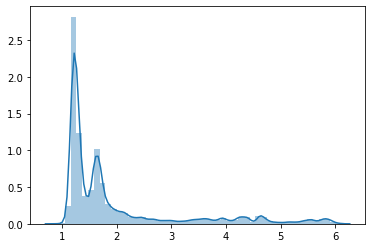

In [80]:
sns.distplot(gbprediction)
plt.show()

In [81]:
gbprediction.to_csv('gbresult.csv')

**Result is 0.5440**